In [1]:
import phoebe
from phoebe import u, c

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
importlib.reload(gen_utils)

logger = phoebe.logger(clevel='WARNING')

In [2]:
# b = phoebe.load("./bundle-saves/default-fw-models")
b = phoebe.load("./bundle-saves/ebai-estimates")

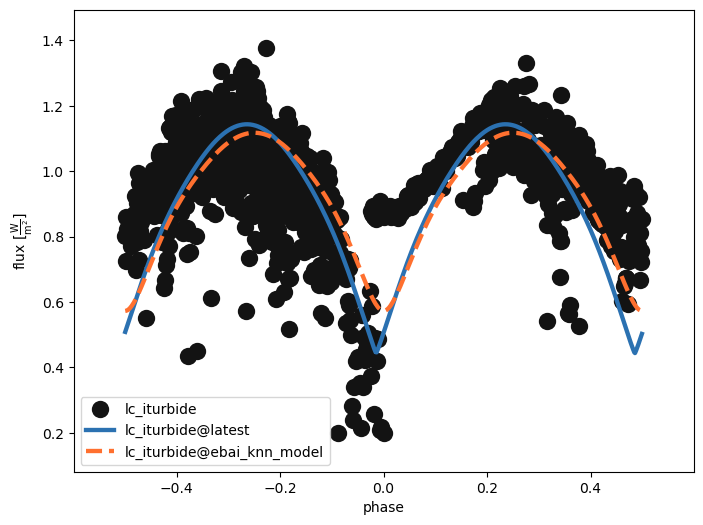

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [3]:
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True)

In [3]:
print(b['requiv'])
print(b['requivratio'])
print(b['mass'])
print(b['sma@binary'])
print(b['sma'])
print(b['pot@contact_envelope'])
print(b['fillout_factor'])

ParameterSet: 3 parameters
         requiv@primary@component: 1.5 solRad
C      requiv@secondary@component: 1.4999999999999996 solRad
                requiv@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
C    requivratio@binary@component: 0.9999999999999997
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
ParameterSet: 4 parameters
C          mass@primary@component: 2.271131401997625 solMass
C        mass@secondary@component: 2.271131401997625 solMass
          mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)
        mass@secondary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ((1.000000 / {q@binary@component}) + 1.000000)) * 2942.2062175044

## Manual parameter estimates

### `q` from $P_{orb} - q$ relation
Used mean value obtained from https://github.com/Somayeh91/p_q_relations_contact_binaries. Script ran using a period of $0.3332532532532533 \space \mathrm{d}$ obtained
from PHOEBE's Lomb-Scargle periodogram estimator.

In [26]:
# q_mean = 0.4114017324225817
# b.set_value(qualifier='q', value=q_mean)

q_high = 0.4720277233326842
b.set_value(qualifier='q', value=q_high)

# q_low = 0.3520822884458968
# b.set_value(qualifier='q', value=q_low)

print(b.run_checks())

Mon, 24 Jul 2023 17:19 BUNDLE       ERROR   Constraint 'requiv@secondary@star@constraint' raised the following error while attempting to solve for 'requiv@secondary@star@component'.  Consider flipping the constraint or changing the value of one of ['pot@contact_envelope@envelope@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv@secondary@star@component'] until the constraint succeeds.  Original error: potential < L2/L3 critical value
Mon, 24 Jul 2023 17:19 BUNDLE       ERROR   Constraint 'fillout_factor@contact_envelope@envelope@constraint' raised the following error while setting the value of 'fillout_factor@contact_envelope@envelope@component'.  Original error: value of fillout_factor=1.3639784856225907 not within limits of [<Quantity 0.>, <Quantity 1.>]


Run Checks Report: FAIL
ERROR: primary is overflowing at L2/L3 (requiv=1.8337971083408802, requiv_min=1.4980542644146988, requiv_max=1.7599280950037257) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@fast_compute or ld_mode@primary@lc_iturbide. (3 affected parameters, affecting run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@fast_compute or ld_mode@secondary@lc_iturbide. (3 affected parameters, affecting run_compute)


In [5]:
print(b['requiv'])
print(b['requivratio'])
print(b['mass'])
print(b['sma@binary'])
print(b['sma'])
print(b['pot@contact_envelope'])
print(b['fillout_factor'])

ParameterSet: 3 parameters
         requiv@primary@component: 1.5 solRad
C      requiv@secondary@component: 1.4999999999999996 solRad
                requiv@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
C    requivratio@binary@component: 0.9999999999999997
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
ParameterSet: 4 parameters
C          mass@primary@component: 3.218263588353929 solMass
C        mass@secondary@component: 1.3239992156413207 solMass
          mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)
        mass@secondary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ((1.000000 / {q@binary@component}) + 1.000000)) * 2942.206217504

### `requivratio` of primary according to **[Latkovic (2021)]**

Ratio of radii proportional to mass ratio due to sharing the same Roche surface

In [13]:
print(b['requivratio'])
print(b['requiv'])
print(b['sma@binary'])
print(b['pot'])
print(b['fillout_factor'])

ParameterSet: 2 parameters
C    requivratio@binary@component: 0.6847132715415287
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
ParameterSet: 4 parameters
C        requiv@primary@component: 1.62223698197651 solRad
C      requiv@secondary@component: 1.110767191144792 solRad
        requiv@primary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 1)
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
Parameter: sma@binary@component
                       Qualifier: sma
                     Description: Semi-major axis of the orbit (defined at time t0@system)
                           Value: 3.35 solRad
                  Constrained by: 
                      Constrains: asini@binary@component, requiv@primary@component, requiv@secondary@component, requivratio@binary@component, requivsumfrac@bi

In [15]:
b.flip_constraint('pot', solve_for='fillout_factor')
b.flip_constraint('requiv@primary', solve_for='pot')
b.flip_constraint('requivratio', solve_for='requiv@primary')

<ConstraintParameter: {requiv@primary@component} = {requiv@secondary@component} / {requivratio@binary@component} (solar units) => 1.62223698197651 solRad>

In [20]:
b.set_value(qualifier='requivratio', value=1)
print(b.run_checks())

Mon, 10 Jul 2023 18:42 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


Run Checks Report: FAIL
ERROR: primary is underflowing at L1 and not a contact system (requiv=1.1297295097118374, requiv_min=1.4917226073543166, requiv_max=1.6994641852229964) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@fast_compute or ld_mode@primary@lc_iturbide. (3 affected parameters, affecting run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@fast_compute or ld_mode@secondary@lc_iturbide. (3 affected parameters, affecting run_compute)


In [27]:
# b.flip_constraint(qualifier='requivratio', solve_for='requiv@primary')
r_ratio = b.get_value(qualifier='q')**0.46
print(r_ratio)
b.set_value(qualifier='requivratio', value=r_ratio)
print(b.run_checks())

0.7079866246149367
Run Checks Report: FAIL
ERROR: primary is overflowing at L2/L3 (requiv=1.8517379374463694, requiv_min=1.4980542644146988, requiv_max=1.7599280950037257) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@fast_compute or ld_mode@primary@lc_iturbide. (3 affected parameters, affecting run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@fast_compute or ld_mode@secondary@lc_iturbide. (3 affected parameters, affecting run_compute)


In [17]:
print(b['requiv'])
print(b['requivratio'])
print(b['mass'])
print(b['sma@binary'])
print(b['sma'])
print(b['pot@contact_envelope'])
print(b['fillout_factor'])

ParameterSet: 4 parameters
C        requiv@primary@component: 1.8898061209295554 solRad
C      requiv@secondary@component: 1.255971153162538 solRad
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
        requiv@primary@constraint: {requiv@secondary@component} / {requivratio@binary@component}
Parameter: requivratio@binary@component
                       Qualifier: requivratio
                     Description: ratio between equivalent radii of children stars
                           Value: 0.6646031776766351
                  Constrained by: 
                      Constrains: requivsumfrac@binary@component
                      Related to: requiv@primary@component, requiv@secondary@component, sma@binary@component, requivsumfrac@binary@component

ParameterSet: 4 parameters
C          mass@primary@component: 3.218263588353929 solMass
C        mass@secondary@component: 1.3239992156413207 solMass
 

### `sma` from Kepler's third law

Taken using both components' stellar mass; calculated for this model using the estimated mass ratio, but keeping close to default component masses.

In [20]:
b.set_value(qualifier='sma', component='binary', value=3.35*u.solRad)

In [21]:
# while not b.run_checks().passed:
p_orb = b.get_quantity(qualifier='period', component='binary', unit=u.second)
print(p_orb)
m_tot = b.get_quantity(qualifier='mass', component='primary', context='component', unit=u.kg) + b.get_quantity(qualifier='mass', component='secondary', context='component', unit=u.kg)
print(m_tot)
print(c.G)

sma_kepler = np.power(((p_orb**2) * c.G*m_tot) / (4*np.pi**2), 1/3)
# sma_kepler = np.power(((p_orb**2) * c.G.to((u.m**3)/(u.solMass*u.s**2))*m_tot) / (4*np.pi**2), 1/3)

# b.set_value(qualifier='sma', component='binary', value=sma_kepler, unit=u.meter)
# print(b.get_quantity(qualifier='sma', component='binary', unit=u.solRad))

# b.set_value(qualifier='sma', component='binary', value=sma_kepler.to(u.solRad))
# b.get_quantity(qualifier='sma', component='binary', unit=u.solRad)

sma_kepler.to(u.solRad), b.get_quantity(qualifier='sma', component='binary')

28793.081081081084 s
9.031880194768762e+30 kg
  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


(<Quantity 3.35000001 solRad>, <Quantity 3.35 solRad>)

In [28]:
print(b['requiv'])
print(b['requivratio'])
print(b['mass'])
print(b['sma@binary'])
print(b['sma'])
print(b['pot@contact_envelope'])
print(b['fillout_factor'])
print(b.run_checks())

ParameterSet: 4 parameters
C        requiv@primary@component: 1.8517379374463694 solRad
C      requiv@secondary@component: 1.3110056920040798 solRad
      requiv@secondary@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
        requiv@primary@constraint: {requiv@secondary@component} / {requivratio@binary@component}
Parameter: requivratio@binary@component
                       Qualifier: requivratio
                     Description: ratio between equivalent radii of children stars
                           Value: 0.7079866246149367
                  Constrained by: 
                      Constrains: requivsumfrac@binary@component
                      Related to: requiv@primary@component, requiv@secondary@component, sma@binary@component, requivsumfrac@binary@component

ParameterSet: 4 parameters
C          mass@primary@component: 3.0857182456533665 solMass
C        mass@secondary@component: 1.4565445583418832 solMass

In [19]:
# first increase sma of binary to avoid overflow
logger.setLevel('ERROR')
initSma = b.get_value(qualifier='sma', component='binary', unit=u.solRad)
while not b.run_checks().passed:
	initSma += 0.1
	b.set_value(qualifier='sma', component='binary', value=initSma*u.solRad)
	# print(initSma)
	print(b.run_checks())
	print(b['requiv@primary@component'] - b['requiv_max@primary@component'])

b.get_quantity(qualifier='sma', component='binary')

Run Checks Report: FAIL
ERROR: primary is overflowing at L2/L3 (requiv=1.946218243942378, requiv_min=1.5855357220887234, requiv_max=1.8347934319682953) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@fast_compute or ld_mode@primary@lc_iturbide. (3 affected parameters, affecting run_compute)
ERROR: ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@fast_compute or ld_mode@secondary@lc_iturbide. (3 affected parameters, affecting run_compute)
Constrains (qualifier): None
Expression in SI (value): {requiv@primary@component} - {requiv_max@primary@component}
Current Result (result): 0.11142481197408274 solRad
Run Checks Report: FAIL
ERROR: primary is overflowing

KeyboardInterrupt: 

In [7]:
print(b['requiv'])
print(b['requivratio'])
print(b['mass'])
print(b['sma@binary'])
print(b['pot@contact_envelope'])
print(b['pot@contact_envelope@component'])
print(b['fillout_factor'])

ParameterSet: 3 parameters
         requiv@primary@component: 1.5 solRad
C      requiv@secondary@component: 0.9977430824372558 solRad
                requiv@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
ParameterSet: 2 parameters
C    requivratio@binary@component: 0.6651620549581706
           requivratio@constraint: {requiv@secondary@component} / {requiv@primary@component}
ParameterSet: 4 parameters
C          mass@primary@component: 2.9385783422551897 solMass
C        mass@secondary@component: 1.2089362208632632 solMass
          mass@primary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218)
        mass@secondary@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ((1.000000 / {q@binary@component}) + 1.000000)) * 2942.20621750

## Run initial forward compute model

**TODO:** look into radius ratio, for now only taking into account mass ratio and using the PHOEBE default contact model params

100%|██████████| 1193/1193 [00:46<00:00, 25.86it/s]


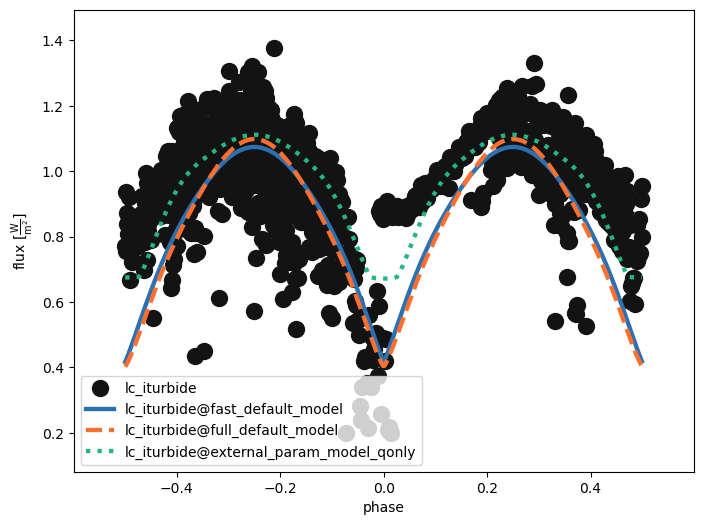

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [8]:
b.set_value(qualifier='pblum', value=(3*np.pi)*u.W)

gen_utils.avoidAtmosphereErrors(b)
b.run_compute(compute='fast_compute', model='external_param_model_qonly', overwrite=True)
b.plot(x='phase', kind='lc', show=True, legend=True)

In [9]:
gen_utils.animateMesh(b, logger)

<Figure size 800x600 with 0 Axes>

In [16]:
gen_utils.animateMesh(b, logger, component='primary')
gen_utils.animateMesh(b, logger, component='secondary')

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Mon, 10 Jul 2023 18:47 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
100%|██████████| 1193/1193 [02:33<00:00,  7.77it/s]


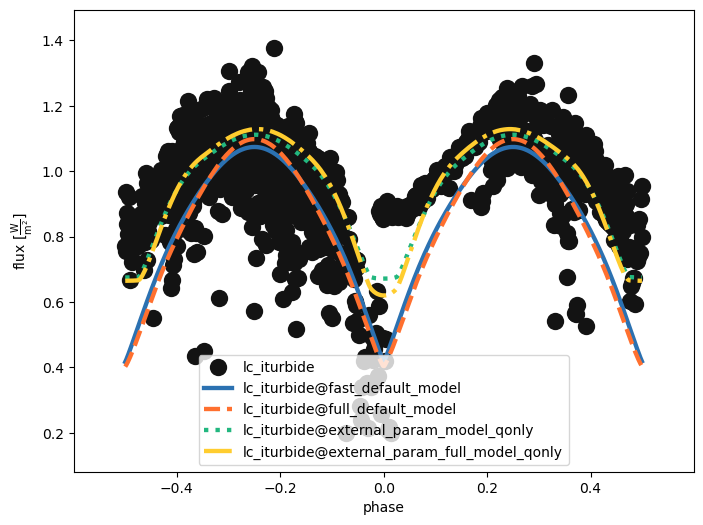

<Figure size 800x600 with 0 Axes>

In [10]:
gen_utils.resetAtmosphere(b)
b.run_compute(compute='phoebe01', model='external_param_full_model_qonly', overwrite=True)
b.plot(x='phase', kind='lc', show=True, legend=True)
gen_utils.animateMesh(b, logger)

In [11]:
b.save("./bundle-saves/external-param-estimates-qonly")

'./bundle-saves/external-param-estimates-qonly'